In [3]:
import pandas as pd
import seaborn as sns


Part 1: Understanding Product Categories

# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [4]:
df = pd.read_csv('/Users/adamo/Documents/Bootcamp/Week 4/labs/lab-eda-univariate/data/amz_uk_price_prediction_dataset.csv')

In [5]:
df.shape

(2443651, 9)

# Frequency table for top 10 categories

In [6]:
df1 = df['category'].value_counts().sort_values(ascending=False)
df1 = pd.DataFrame(df1)
df1.head(10)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


# Bar and pie charts of top 5 categories

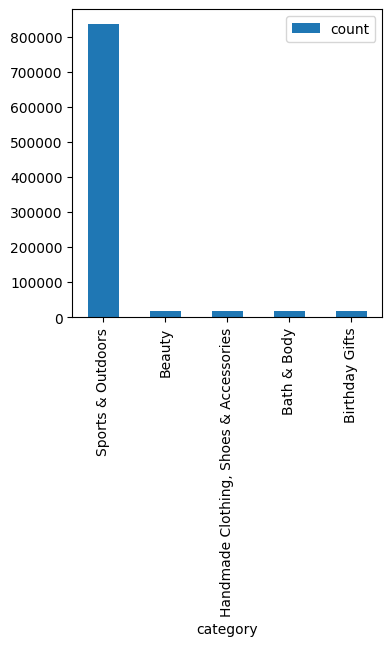

In [7]:
df_top5 = df1.head(5)

fig = df_top5.plot.bar(figsize=(4,4))

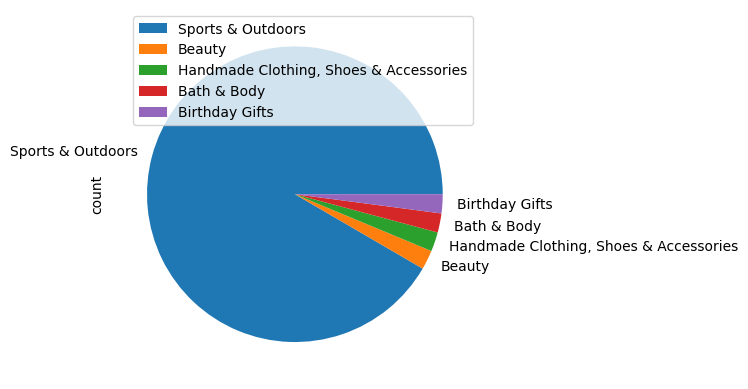

In [8]:
pie = df_top5.plot.pie(subplots=True)

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

# Measures of centrality

In [9]:
price_mean = df['price'].mean()
price_med = df['price'].median()
price_mode = df['price'].mode()
price_std = df['price'].std()
price_var = df['price'].var()
price_min = df['price'].min()
price_max = df['price'].max()

print(f'Price std: {price_std}\nPrice var: {price_var}\nPrice min: {price_min}\nPrice max: {price_max}')

print(f"Price mean: {price_mean} \nPrice median: {price_med} \nPrice mode: {price_mode}")

Price std: 345.60886175349884
Price var: 119445.48532254907
Price min: 0.0
Price max: 100000.0
Price mean: 89.24380943923663 
Price median: 19.09 
Price mode: 0    9.99
Name: price, dtype: float64


- The standard deviation of 345.61 indicates a considerable spread in prices around the mean.
- With a variance of 119445.49, prices exhibit significant variability within the dataset.
- The presence of a minimum price of $0.0 suggests the availability of free or extremely low-cost items.
- The maximum price of $100,000.0 highlights the existence of high-value products on Amazon.
- The mean price of $89.24 provides an average value for products in the dataset.
- A median price of $19.09 suggests a central tendency lower than the mean, hinting at a potential skew in the distribution towards lower values.
- The mode price of $9.99 indicates that this price point occurs most frequently within the dataset.

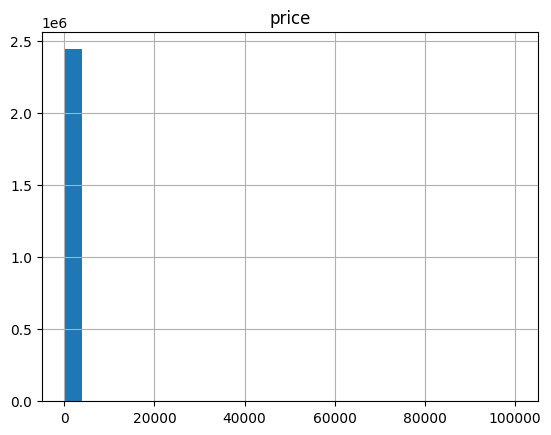

In [10]:
ax=df.hist(column='price', bins=25)

In [11]:
#Remove prices above mean+2xstd ??
x = price_mean + 2*price_std
df3=df[df['price'] < x]

print(f'Removing all prices above {x} (mean + 2std).\nNew shape {df3.shape}')


Removing all prices above 780.4615329462343 (mean + 2std).
New shape (2389675, 9)


<Axes: xlabel='price', ylabel='Count'>

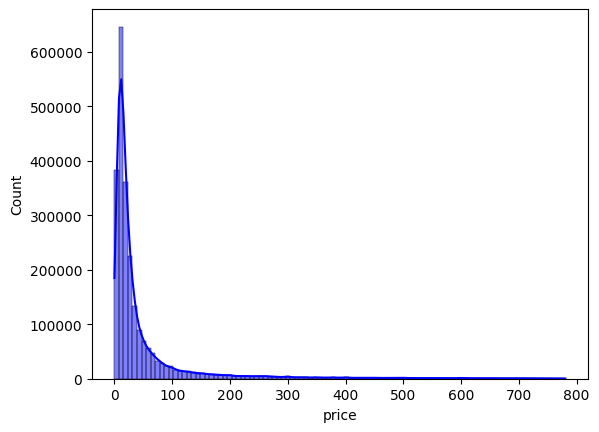

In [12]:
sns.histplot(df3['price'], kde=True, bins=100, color="blue")


<Axes: ylabel='price'>

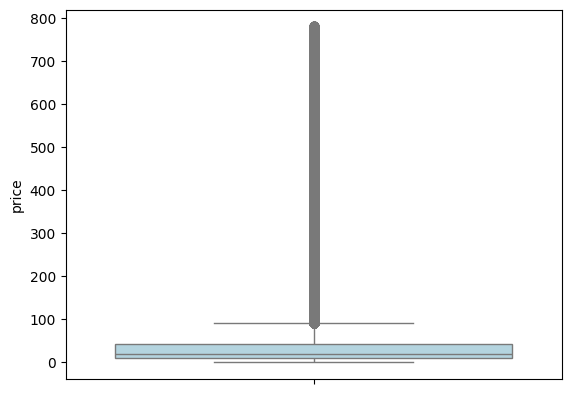

In [13]:
sns.boxplot(data = df3['price'], color="lightblue")

# It seems that we could even remove everything above 100$ price

<Axes: ylabel='price'>

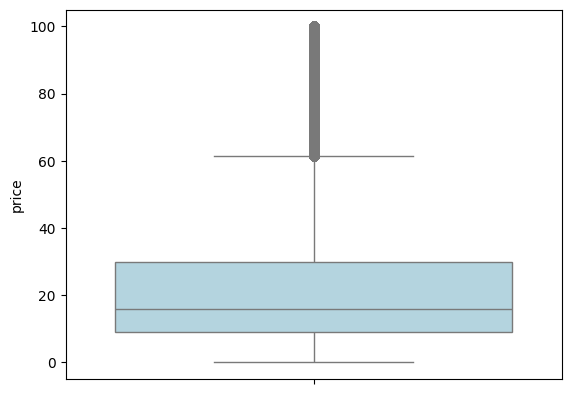

In [14]:
df4=df[df['price'] < 100]

sns.boxplot(data = df4['price'], color="lightblue")


Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [15]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [16]:
reviews_mean = df['stars'].mean()
reviews_med = df['stars'].median()
reviews_mode = df['stars'].mode()
reviews_std = df['stars'].std()
reviews_var = df['stars'].var()
reviews_min = df['stars'].min()
reviews_max = df['stars'].max()

print(f'reviews std: {reviews_std}\nreviews var: {reviews_var}\nreviews min: {reviews_min}\nreviews max: {reviews_max}')

print(f"reviews mean: {reviews_mean} \nreviews median: {reviews_med} \nreviews mode: {reviews_mode}")

reviews std: 2.1948653785134207
reviews var: 4.817434029796862
reviews min: 0.0
reviews max: 5.0
reviews mean: 2.152836472966065 
reviews median: 0.0 
reviews mode: 0    0.0
Name: stars, dtype: float64


In [17]:
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)


print(f'{Q1}, {Q3}')

0.0, 4.4


In [18]:
review_skew=df['stars'].skew()
review_kurt = df['stars'].kurtosis()

print(f'Skewness: {review_skew}. Intepretation: Reviews(stars) distribution is moderately skewed positevely. It meanse that there are many outliers above mode affecting mean.\nKurtosis: {review_kurt}. Interpretation: Negative kurtosis indicates flat distribution.')


Skewness: 0.08120735761080985. Intepretation: Reviews(stars) distribution is moderately skewed positevely. It meanse that there are many outliers above mode affecting mean.
Kurtosis: -1.9260061280432985. Interpretation: Negative kurtosis indicates flat distribution.


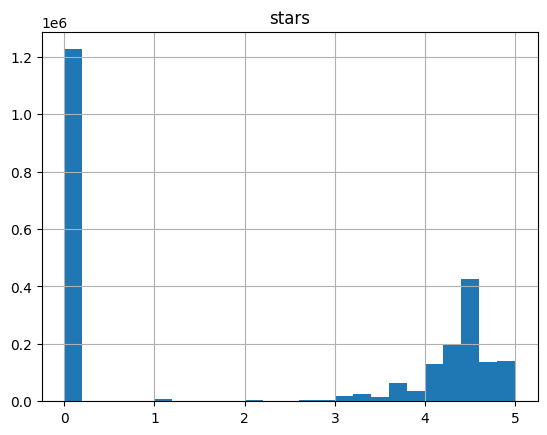

In [19]:
ax=df.hist(column='stars', bins=25)

In [20]:
#if users just skipped rating and that's why there's so many 0 star ratings then we can remove 0s

df5=df[df['stars'] >0]


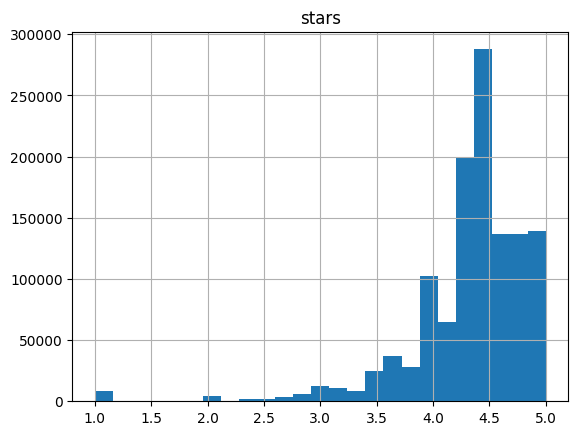

In [21]:
ax2=df5.hist(column='stars', bins=25)

In [24]:
review_skew2=df5['stars'].skew()
review_kurt2 = df5['stars'].kurtosis()
df5['stars'].describe()

count    1.218010e+06
mean     4.319161e+00
std      5.552868e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [25]:
print(f'Skewness without 0 ratings: {review_skew2}. Kurtosis without 0 ratings: {review_kurt2}')

Skewness without 0 ratings: -2.3795681122127945. Kurtosis without 0 ratings: 9.78193769066435


The negative skewness value of -2.38 suggests a significant leftward skew in the distribution of product ratings, indicating that there is a heavier concentration of ratings towards the higher scores.

The high kurtosis value of 9.78 indicates that the distribution of ratings is heavily tailed and exhibits extreme outliers, potentially indicating a higher frequency of both very low and very high ratings compared to a normal distribution.


From a business standpoint, most product ratings are positive, but there are also some extremely low and high ratings, which businesses should investigate further to understand customer satisfaction accurately.